In [1]:
import sys

sys.path.append('/mnt/8tb/fbao/drug__/code')
from clipn import CLIPn
from functions.helper import *

import umap



In [2]:
import pickle

with open('cp_exp_v4.pickle', 'rb') as f:
    data = pickle.load(f)

X = data['X']
y = data['y']
labels = data['labels']

In [3]:
clipn = CLIPn(X, y, latent_dim=10, gpu="cuda:2")
loss = clipn.fit(X, y)
z_clipn = clipn.predict(X)


Running CLIPn ...


  0%|          | 0/300 [00:00<?, ?it/s]

In [4]:
meta = pd.read_csv('../data_Rosetta_check/data/LUAD_meta_exp.csv')
feature = pd.read_csv('../data_Rosetta_check/normalized_LUAD.csv')

pre = dict()
pre[7] = feature.values
z_new = clipn.predict(pre)

In [5]:
data_color = ["#008585", "#f29f05", "#d50032", "#58508d", "#e04d01", "#fb91db", "#2117a8", "#fc9e55", "#59b6bf",
              "#ffefa8", "#b2b2b2", "#a30099", "#2d78ef"]
label_color = pd.read_excel('../code_database/label_map.xlsx', header=0, index_col=None)
label_map = dict(zip(label_color.Name, label_color.Color))
data_map = dict(zip(range(13), data_color))


def umap_single_dataset(X, y, id):
    sns.set_style("whitegrid", {'axes.grid': False})
    umap_ = umap.UMAP(random_state=2024)
    umap_.fit(X)

    embed = umap_.transform(X)

    plot_pd = pd.DataFrame({'x': embed[:, 0], 'y': embed[:, 1], 'label': y, 'dataset': id})

    plt.subplots(1, 2, figsize=(18, 8))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=plot_pd, x='x', y='y', hue='label', palette=label_map, s=10)
    sns.scatterplot(data=plot_pd[plot_pd.dataset.isin([6])], x='x', y='y', hue='label', palette=label_map, s=20,
                    marker='^', edgecolor='black', linewidth=0.5)
    sns.scatterplot(data=plot_pd[plot_pd.dataset.isin([7])], x='x', y='y', hue='label', palette=label_map, s=20,
                    marker='s', edgecolor='black', linewidth=0.5)
    plt.legend().remove()

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=plot_pd, x='x', y='y', hue='dataset', palette='tab10', s=10)
    sns.scatterplot(data=plot_pd[plot_pd.dataset.isin([6])], x='x', y='y', hue='dataset', palette='tab10', s=20,
                    marker='^', edgecolor='black', linewidth=0.5)
    sns.scatterplot(data=plot_pd[plot_pd.dataset.isin([7])], x='x', y='y', hue='dataset', palette='tab10', s=20,
                    marker='s', edgecolor='black', linewidth=0.5)

    plt.show()


Z, y, id = dict_to_array(z_clipn, labels)

/home/fbao/.local/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


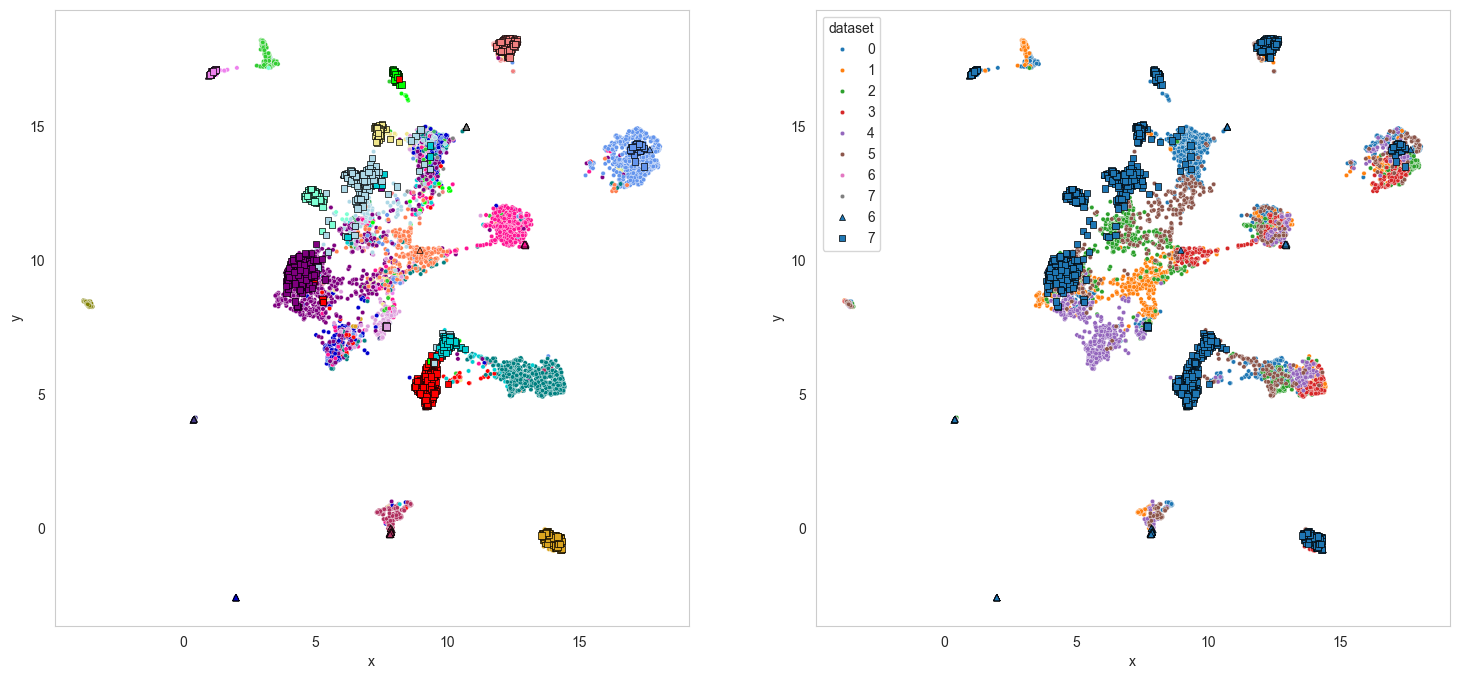

In [6]:
umap_single_dataset(Z, y, id)

In [7]:
data = dict()
data['X'] = X
data['y'] = labels
data['z_clipn'] = z_clipn
data['z_ko'] = z_new[7]

with open('embeddings.pickle', 'wb') as f:
    pickle.dump(data, f)